# HR Analytics Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hr_df = pd.read_csv('HR_comma_sep.csv')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


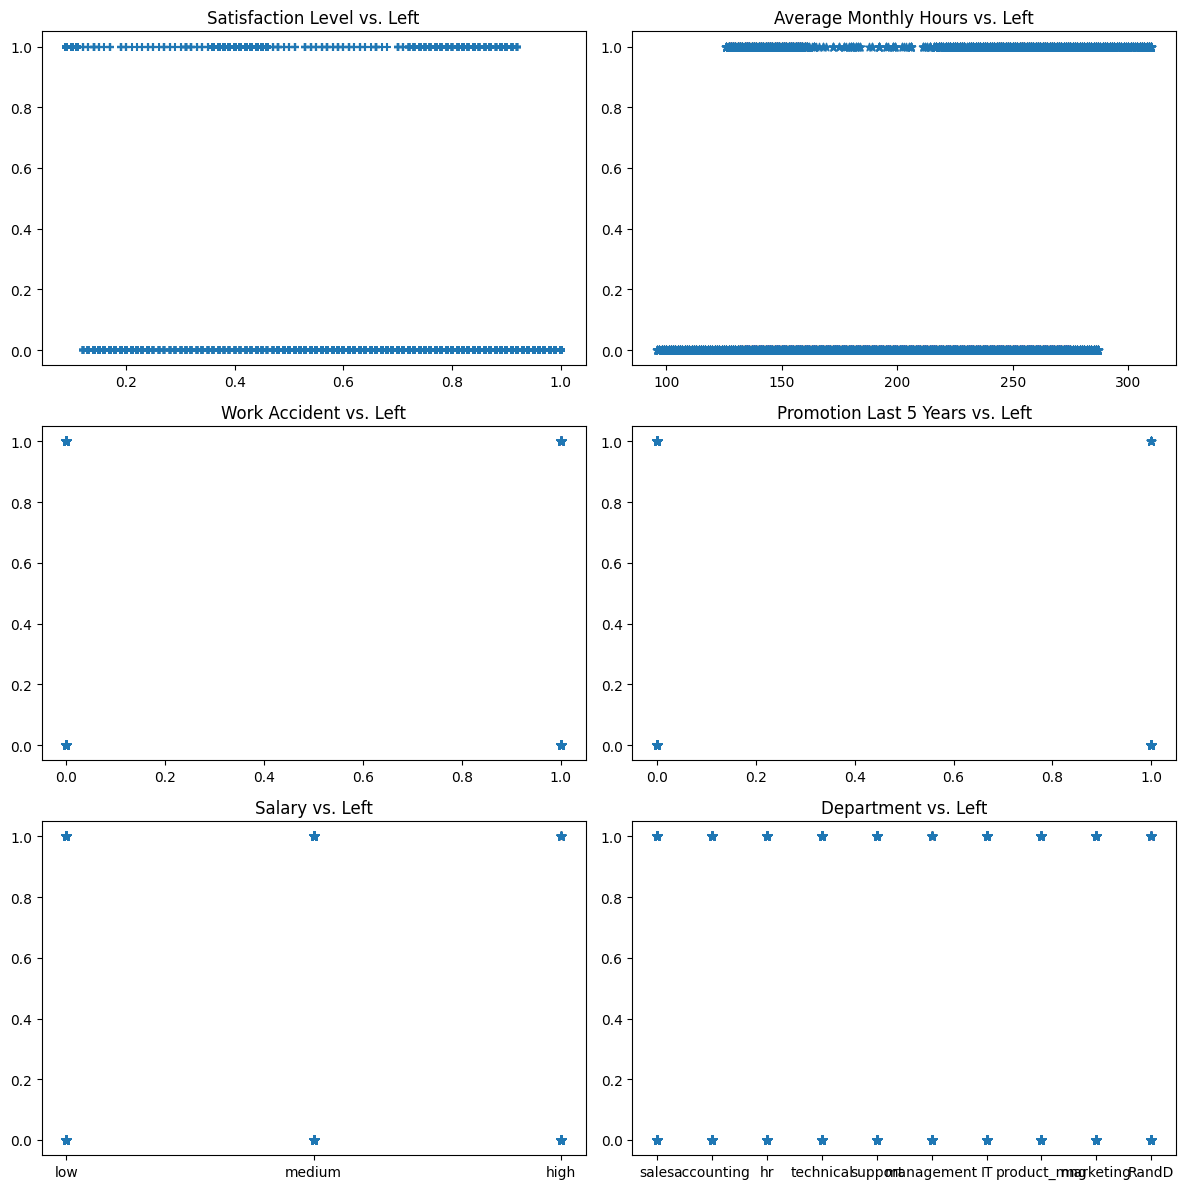

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns of subplots

axes[0, 0].scatter('satisfaction_level', 'left', marker='+', data=hr_df)
axes[0, 0].set_title('Satisfaction Level vs. Left')

axes[0, 1].scatter('average_montly_hours', 'left', marker='*', data=hr_df)
axes[0, 1].set_title('Average Monthly Hours vs. Left')

axes[1, 0].scatter('Work_accident', 'left', marker='*', data=hr_df)
axes[1, 0].set_title('Work Accident vs. Left')

axes[1, 1].scatter('promotion_last_5years', 'left', marker='*', data=hr_df)
axes[1, 1].set_title('Promotion Last 5 Years vs. Left')

axes[2, 0].scatter('salary', 'left', marker='*', data=hr_df)
axes[2, 0].set_title('Salary vs. Left')

axes[2, 1].scatter('Department', 'left', marker='*', data=hr_df)
axes[2, 1].set_title('Department vs. Left')

plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

In [10]:
# salary vs left

hr_df.groupby('salary')['left'].mean()

,left
salary,
high,0.066289
low,0.296884
medium,0.204313


In [11]:
# people with low salary have highest leaving ratio

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
hr_df.drop(['Department', 'salary'], axis='columns').groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [16]:
# we can see that last evaluation is same for both left & retained, so no effect
# same with number_project, average_monthly_hours, time_spend_company

# from above scatter, department also no effect

In [18]:
sub_df = hr_df[[
    'satisfaction_level',
    'average_montly_hours',
    'Work_accident',
    'promotion_last_5years',
    'salary',
    'left'
]]

In [19]:
sub_df.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left
0,0.38,157,0,0,low,1
1,0.80,262,0,0,medium,1
2,0.11,272,0,0,medium,1
3,0.72,223,0,0,low,1
4,0.37,159,0,0,low,1


In [25]:
salary_dummies = pd.get_dummies(sub_df.salary, prefix="salary", dtype=int)

In [26]:
df_with_dummies = pd.concat([sub_df,salary_dummies],axis='columns')

In [27]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,0,low,1,0,1,0
1,0.80,262,0,0,medium,1,0,0,1
2,0.11,272,0,0,medium,1,0,0,1
3,0.72,223,0,0,low,1,0,1,0
4,0.37,159,0,0,low,1,0,1,0


In [32]:
X = df_with_dummies.drop(['salary','left', 'salary_medium'],axis='columns')
y = df_with_dummies.left

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [37]:
y_test

,left
11869,0
9498,0
452,1
6519,0
7289,0
...,...
2689,0
4608,0
6382,0
9005,0


In [38]:
model.score(X_test, y_test)

0.7953333333333333